# Human detection


* https://yongyuan.name/blog/pedestrian-detection-opencv.html



In [1]:
import cv2
import imutils

In [2]:
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [3]:
image = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)
image = imutils.resize(image, width=min(400, image.shape[1]))
orig = image.copy()

# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
padding=(8, 8), scale=1.05)

In [4]:
# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

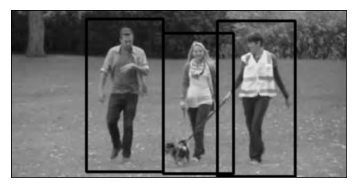

In [5]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.imshow(orig, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [6]:
from imutils.object_detection import non_max_suppression
import numpy as np

# apply non-maxima suppression to the bounding boxes using a
# fairly large overlap threshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

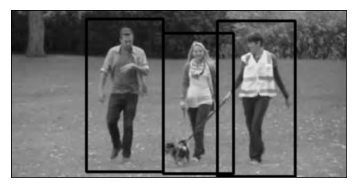

In [7]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()